# Bienvenida

Mi nombre es Francisco Delgado Ayala. He realizado el siguiente Notebook de Jupyter utilizando Python 3, y las librerías incluidas en Anaconda, procurando facilitar la lectura y comprensión del código a través de comentarios explicativos en cada paso.

Espero que el uso de Python facilite la enseñanza de la estadística, la metodología de la investigación y la ciencia de datos en áreas donde será de gran utilidad, tanto para el crecimiento del conocimiento como para el desarrollo de los médicos en formación. Es importante recalcar que algunos términos utilizados en este archivo son empleados por "convención" en cuanto al código, y otros para facilitar la descripción.

## Definiciones

- **Marco de datos** (Dataframe): En el contexto de programación y ciencia de datos, un Dataframe es una estructura bidimensional de datos, similar a una tabla de base de datos, una hoja de cálculo de Excel o una tabla de datos en estadísticas. Está organizado en columnas que pueden contener datos de diferentes tipos (como números, cadenas, entre otros) y permite realizar operaciones como filtrado, agrupación y agregación de datos. Las librerías de Python, como pandas, ofrecen herramientas para manipular Dataframes de manera efectiva.
- **Librería**: En programación, es una colección de funciones y procedimientos que facilita realizar tareas específicas sin redactar código desde cero. (Nota: Aunque en algunos contextos hispanohablantes "librería" se relaciona con libros, en programación se emplea para describir esta colección de herramientas).

## Pruebas estadísticas

Estos términos son ampliamente usados en estadística y en la evaluación de modelos de clasificación. A continuación, te describiré cómo se calcula cada uno, basándome en una matriz de confusión que tiene cuatro componentes: Verdaderos Positivos (VP, o TP en inglés por "True Positives"), Verdaderos Negativos (VN, o TN en inglés por "True Negatives"), Falsos Positivos (FP), y Falsos Negativos (FN).

1. **Exactitud (Accuracy)**: 
    - `(VP+VN) / (VP+VN+FP+FN)`

2. **Precisión o Valor Predictivo Positivo (VPP)**:
    - `(VP) / (VP+FP)`

3. **Sensibilidad (Recall)**:
    - `(VP) / (VP+FN)`
    - Es la proporción de positivos reales que fueron identificados correctamente.

4. **F1-Score**:
    - `2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)`
    - Es la media armónica entre precisión y sensibilidad.

5. **Especificidad**:
    - `(VN) / (VN + FP)`
    - Es la proporción de negativos reales que fueron identificados correctamente.

6. **Valor Predictivo Negativo (VPN)**:
    - `(VN) / (VN + FN)`

Estos cálculos asumen que tienes acceso a la matriz de confusión de tu modelo o método de clasificación. La matriz de confusión es una herramienta esencial para evaluar la calidad de un clasificador, especialmente en contextos donde las clases no están equilibradas.


## 1.-Importando las librerías y archivos necesarios y realizando los ajustes iniciales
### 1.1.-Realizaremos un análisis inicial de los tipos de datos y llevaremos a cabo un análisis exploratorio

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, zscore
import openpyxl as op
import sklearn
#import ydata_profiling as ydp

In [135]:
# Establecememos semillas para reproducibilidad

np.random.seed(1)
semilla_arreglo_aleatorio = np.random.randint(1, 150, size=4)
print('Semillas para arreglos aleatorios: ', semilla_arreglo_aleatorio)

Semillas para arreglos aleatorios:  [ 38 141  73 138]


In [136]:
archivo = 'datos.xlsx'

df = pd.read_excel(archivo, sheet_name = 'p1')
df.sort_index(inplace=True)

## 2.-Limpieza de datos
Transformación de tipo de datos

In [137]:
# Convertir cm a m
df['cc'] = df['cc'] / 100

# Agregaremos las columnas de imc, cct, cnhdl, chdl
df['imc'] = (df['p'] / (df['t'] ** 2))
df['cct'] = df['cc'] / df['t']
df['cnhdl'] = df['c'] - df['hdl']
df['chdl'] = df['c'] / df['hdl']

df.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,18,1,1.0,62.0,1.55,101.0,70.0,85,188,53,0.81,NaN,25.806452,0.522581,135,3.547170
1,18,2,1.0,70.0,1.67,93.0,63.0,86,155,54,0.90,NaN,25.099502,0.538922,101,2.870370
2,19,1,1.0,56.0,1.58,109.0,73.0,93,143,60,0.67,33.6,22.432303,0.424051,83,2.383333
3,19,1,1.0,52.2,1.59,108.0,75.0,93,143,60,0.67,33.6,20.647917,0.421384,83,2.383333
4,19,1,1.0,53.0,1.54,118.0,72.0,83,146,52,0.73,NaN,22.347782,0.474026,94,2.807692


In [138]:
df.dtypes

e          int64
s          int64
u        float64
p        float64
t        float64
ts       float64
td       float64
gs         int64
c          int64
hdl        int64
cc       float64
pp       float64
imc      float64
cct      float64
cnhdl      int64
chdl     float64
dtype: object

In [139]:
df_categorico = df.copy()
df_numerico = df.copy()

# Convertimos las variables categoricas
df_categorico['s'] = df_categorico['s'].map({1: '1', 2: '2'})
df_categorico['u'] = df_categorico['u'].map({1: '1', 2: '2', 3: '3', 4: '4'})

df_categorico['s'] = df_categorico['s'].astype('category')
df_categorico['u'] = df_categorico['u'].astype('category')

In [140]:
# Estandarizaremos los datos y convertiremos las variables correspondientes a tipo categórica y 
# numérica para facilitar el análisis estadístico

# Definimos una función para estandarizar todas las columnas necesarias
def estandarizar_todas_columnas(df, columnas, medias_todas_columnas, desviaciones_todas_columnas):
    for columna in columnas:
        df[columna] = (df[columna] - medias_todas_columnas[columna]) / desviaciones_todas_columnas[columna]
    return df

# Definimos una función para desestandarizar todas las columnas necesarias
def desestandarizar_todas_columnas(df, columnas, medias_todas_columnas, desviaciones_todas_columnas):
    for columna in columnas:
        df[columna] = (df[columna] * desviaciones_todas_columnas[columna]) + medias_todas_columnas[columna]
    return df

# Definimos una función para estandarizar las columnas necesarias
def estandarizar_columnas(df, columnas, medias_columnas, desviaciones_columnas):
    for columna in columnas:
        df[columna] = (df[columna] - medias_columnas[columna]) / desviaciones_columnas[columna]
    return df

# Definimos una función para desestandarizar las columnas necesarias
def desestandarizar_columnas(df, columnas, medias_columnas, desviaciones_columnas):
    for columna in columnas:
        df[columna] = (df[columna] * desviaciones_columnas[columna]) + medias_columnas[columna]
    return df

# Definimos una función para exportar los datos imputados a un archivo excel
def exportar_imputados_a_excel (df, sheet_name):
    filepath = 'datos.xlsx'
    with pd.ExcelWriter(filepath, mode='a', if_sheet_exists='replace') as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [141]:
todas_columnas_estandarizar = ['e', 's', 'u', 'p', 't', 'ts',
                                'td', 'cc', 'gs', 'c', 'hdl', 'pp',
                                'imc', 'cct', 'cnhdl', 'chdl']

todas_medias_columnas = df_numerico[todas_columnas_estandarizar].mean()
todas_desviaciones_columnas = df_numerico[todas_columnas_estandarizar].std()

columnas_estandarizar = ['e', 'p', 't', 'ts', 'td', 
                           'cc', 'gs', 'c', 'hdl', 'pp', 
                           'imc', 'cct', 'cnhdl', 'chdl']

medias_columnas = df_categorico[columnas_estandarizar].mean()
desviaciones_columnas = df_categorico[columnas_estandarizar].std()

In [142]:
dfce = df_categorico.copy()
# dfce = DataFrame Categorico Estandarizado
dfne = df_numerico.copy()
# dfne = DataFrame Numerico Estandarizado

In [143]:
# Estandarizamos el df de variables catégoricas
dfce = estandarizar_columnas(
    dfce, 
    columnas_estandarizar, 
    medias_columnas,
    desviaciones_columnas)

dfce.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,1,1,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,2,1,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,1,1,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,1,1,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,1,1,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


In [144]:
dfce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   e       641 non-null    float64 
 1   s       641 non-null    category
 2   u       636 non-null    category
 3   p       641 non-null    float64 
 4   t       641 non-null    float64 
 5   ts      637 non-null    float64 
 6   td      637 non-null    float64 
 7   gs      641 non-null    float64 
 8   c       641 non-null    float64 
 9   hdl     641 non-null    float64 
 10  cc      552 non-null    float64 
 11  pp      115 non-null    float64 
 12  imc     641 non-null    float64 
 13  cct     552 non-null    float64 
 14  cnhdl   641 non-null    float64 
 15  chdl    641 non-null    float64 
dtypes: category(2), float64(14)
memory usage: 71.8 KB


In [145]:
# Estandarizamos el df de variables numéricas
dfne = estandarizar_todas_columnas(
    dfne,
    todas_columnas_estandarizar,
    medias_todas_columnas,
    desviaciones_todas_columnas)

dfne.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,-0.670465,-0.692851,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,1.489174,-0.692851,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,-0.670465,-0.692851,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,-0.670465,-0.692851,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,-0.670465,-0.692851,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


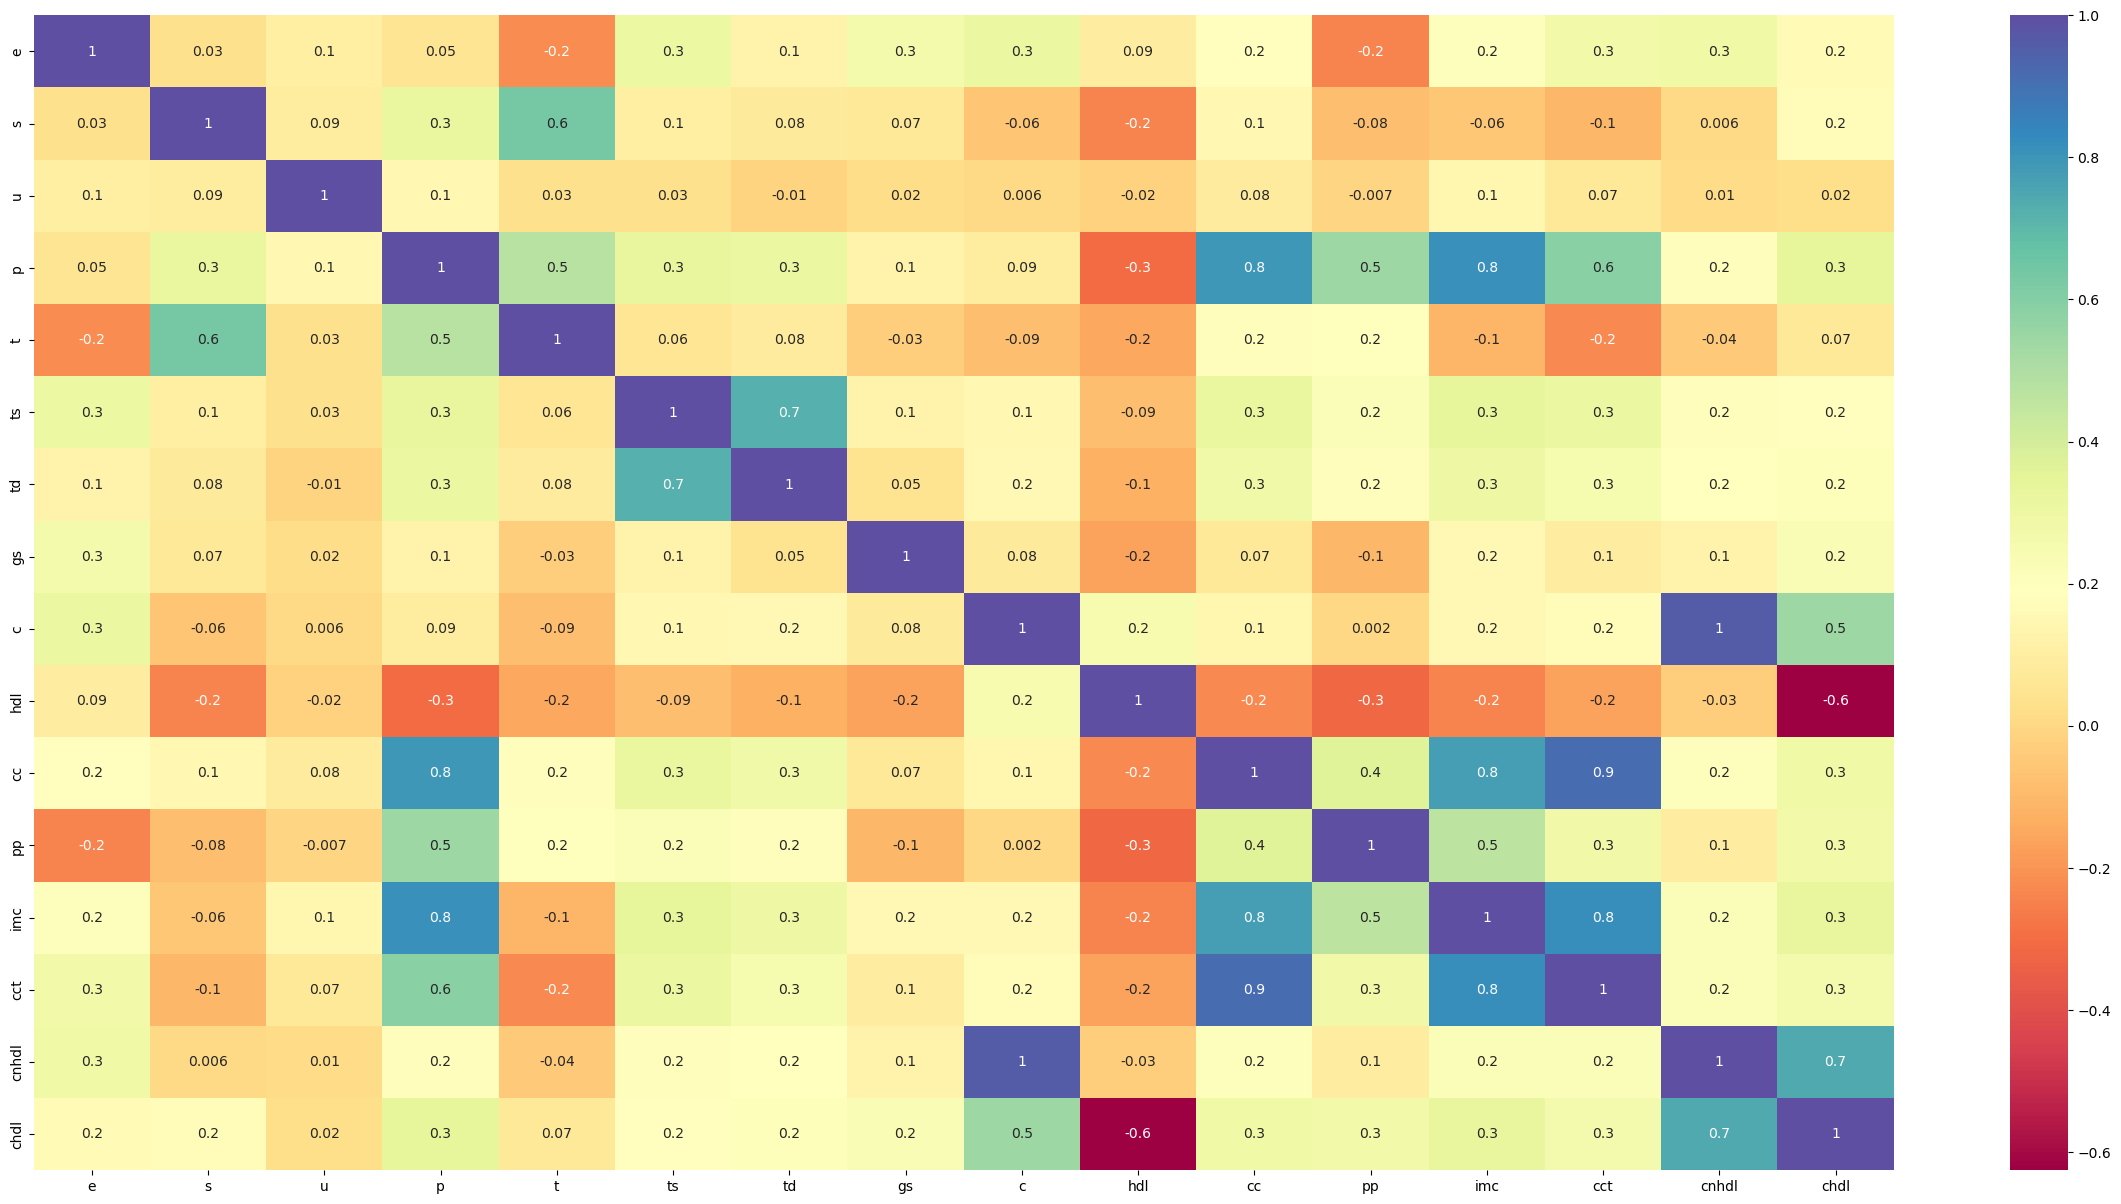

In [146]:
corrMatrix = dfne.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrMatrix, annot=True, fmt='.1g', ax=ax, cmap='Spectral');

# Métodos de predicción

In [147]:
# Librerías generales de Python
from itertools import cycle

# Librerías para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, RocCurveDisplay

# Librerías para regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Librerías para preprocesamiento
from sklearn.preprocessing import LabelBinarizer

# Librerías para evaluación y visualización
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

### Métodos de Clasificación

#### Variable 'u' (turno)

In [148]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 'pp', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = dfce.copy()
datos = dfce[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'u'
variables_predictoras = [columna for columna in datos.columns if 
                         columna != variable_objetivo and columna not in 
                         ['ts', 'td', 'cc', 'pp', 'cct']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

y_puntaje:
[[1.         0.         0.         0.        ]
 [0.79245283 0.0754717  0.05660377 0.0754717 ]]

y_puntaje.ravel():
[1.         0.         0.         0.         0.79245283 0.0754717
 0.05660377 0.0754717 ]

Profundidad óptima del árbol de decisión: 4
Arreglo aleatorio óptimo: 38
Exactitud media del modelo de árbol de decisión: 0.58
Desviación estándar de la exactitud del modelo de árbol de decisión: 0.06
Exactitud de arbolu: 0.61
Precisión de arbolu: 0.64
Sensibilidad de arbolu: 0.61
F1-score de arbolu: 0.5
ROC/AUC de arbolu: 0.71

Matriz de confusión:
 [[13  0  0  0]
 [ 2  0  0  0]
 [ 1  0  0  0]
 [ 6  0  0  1]]


/workspaces/crispy-invention_metodos/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


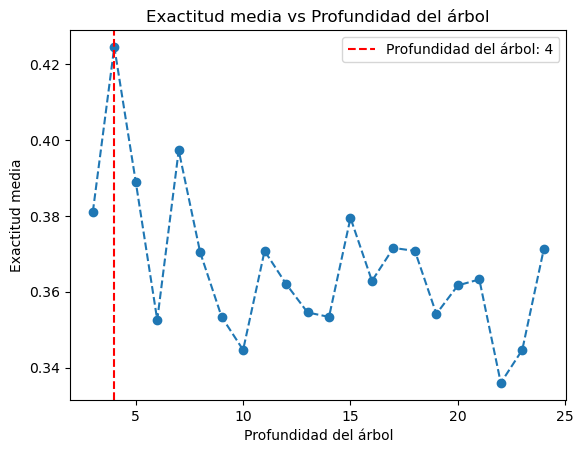

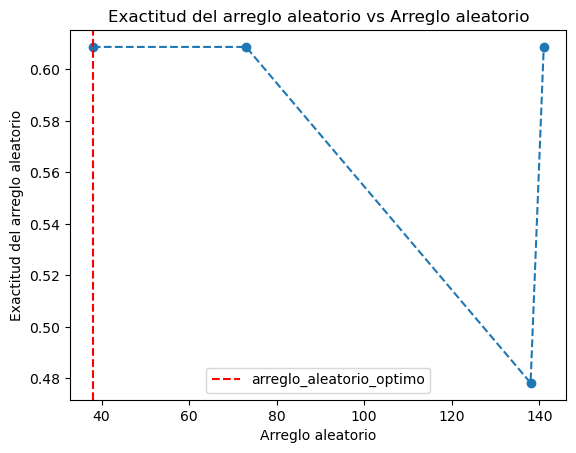

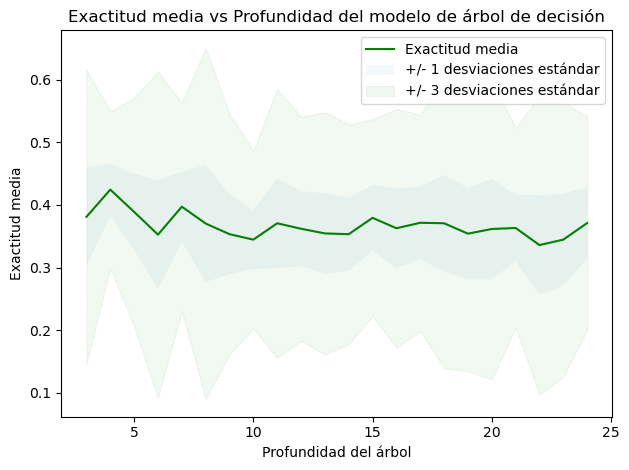

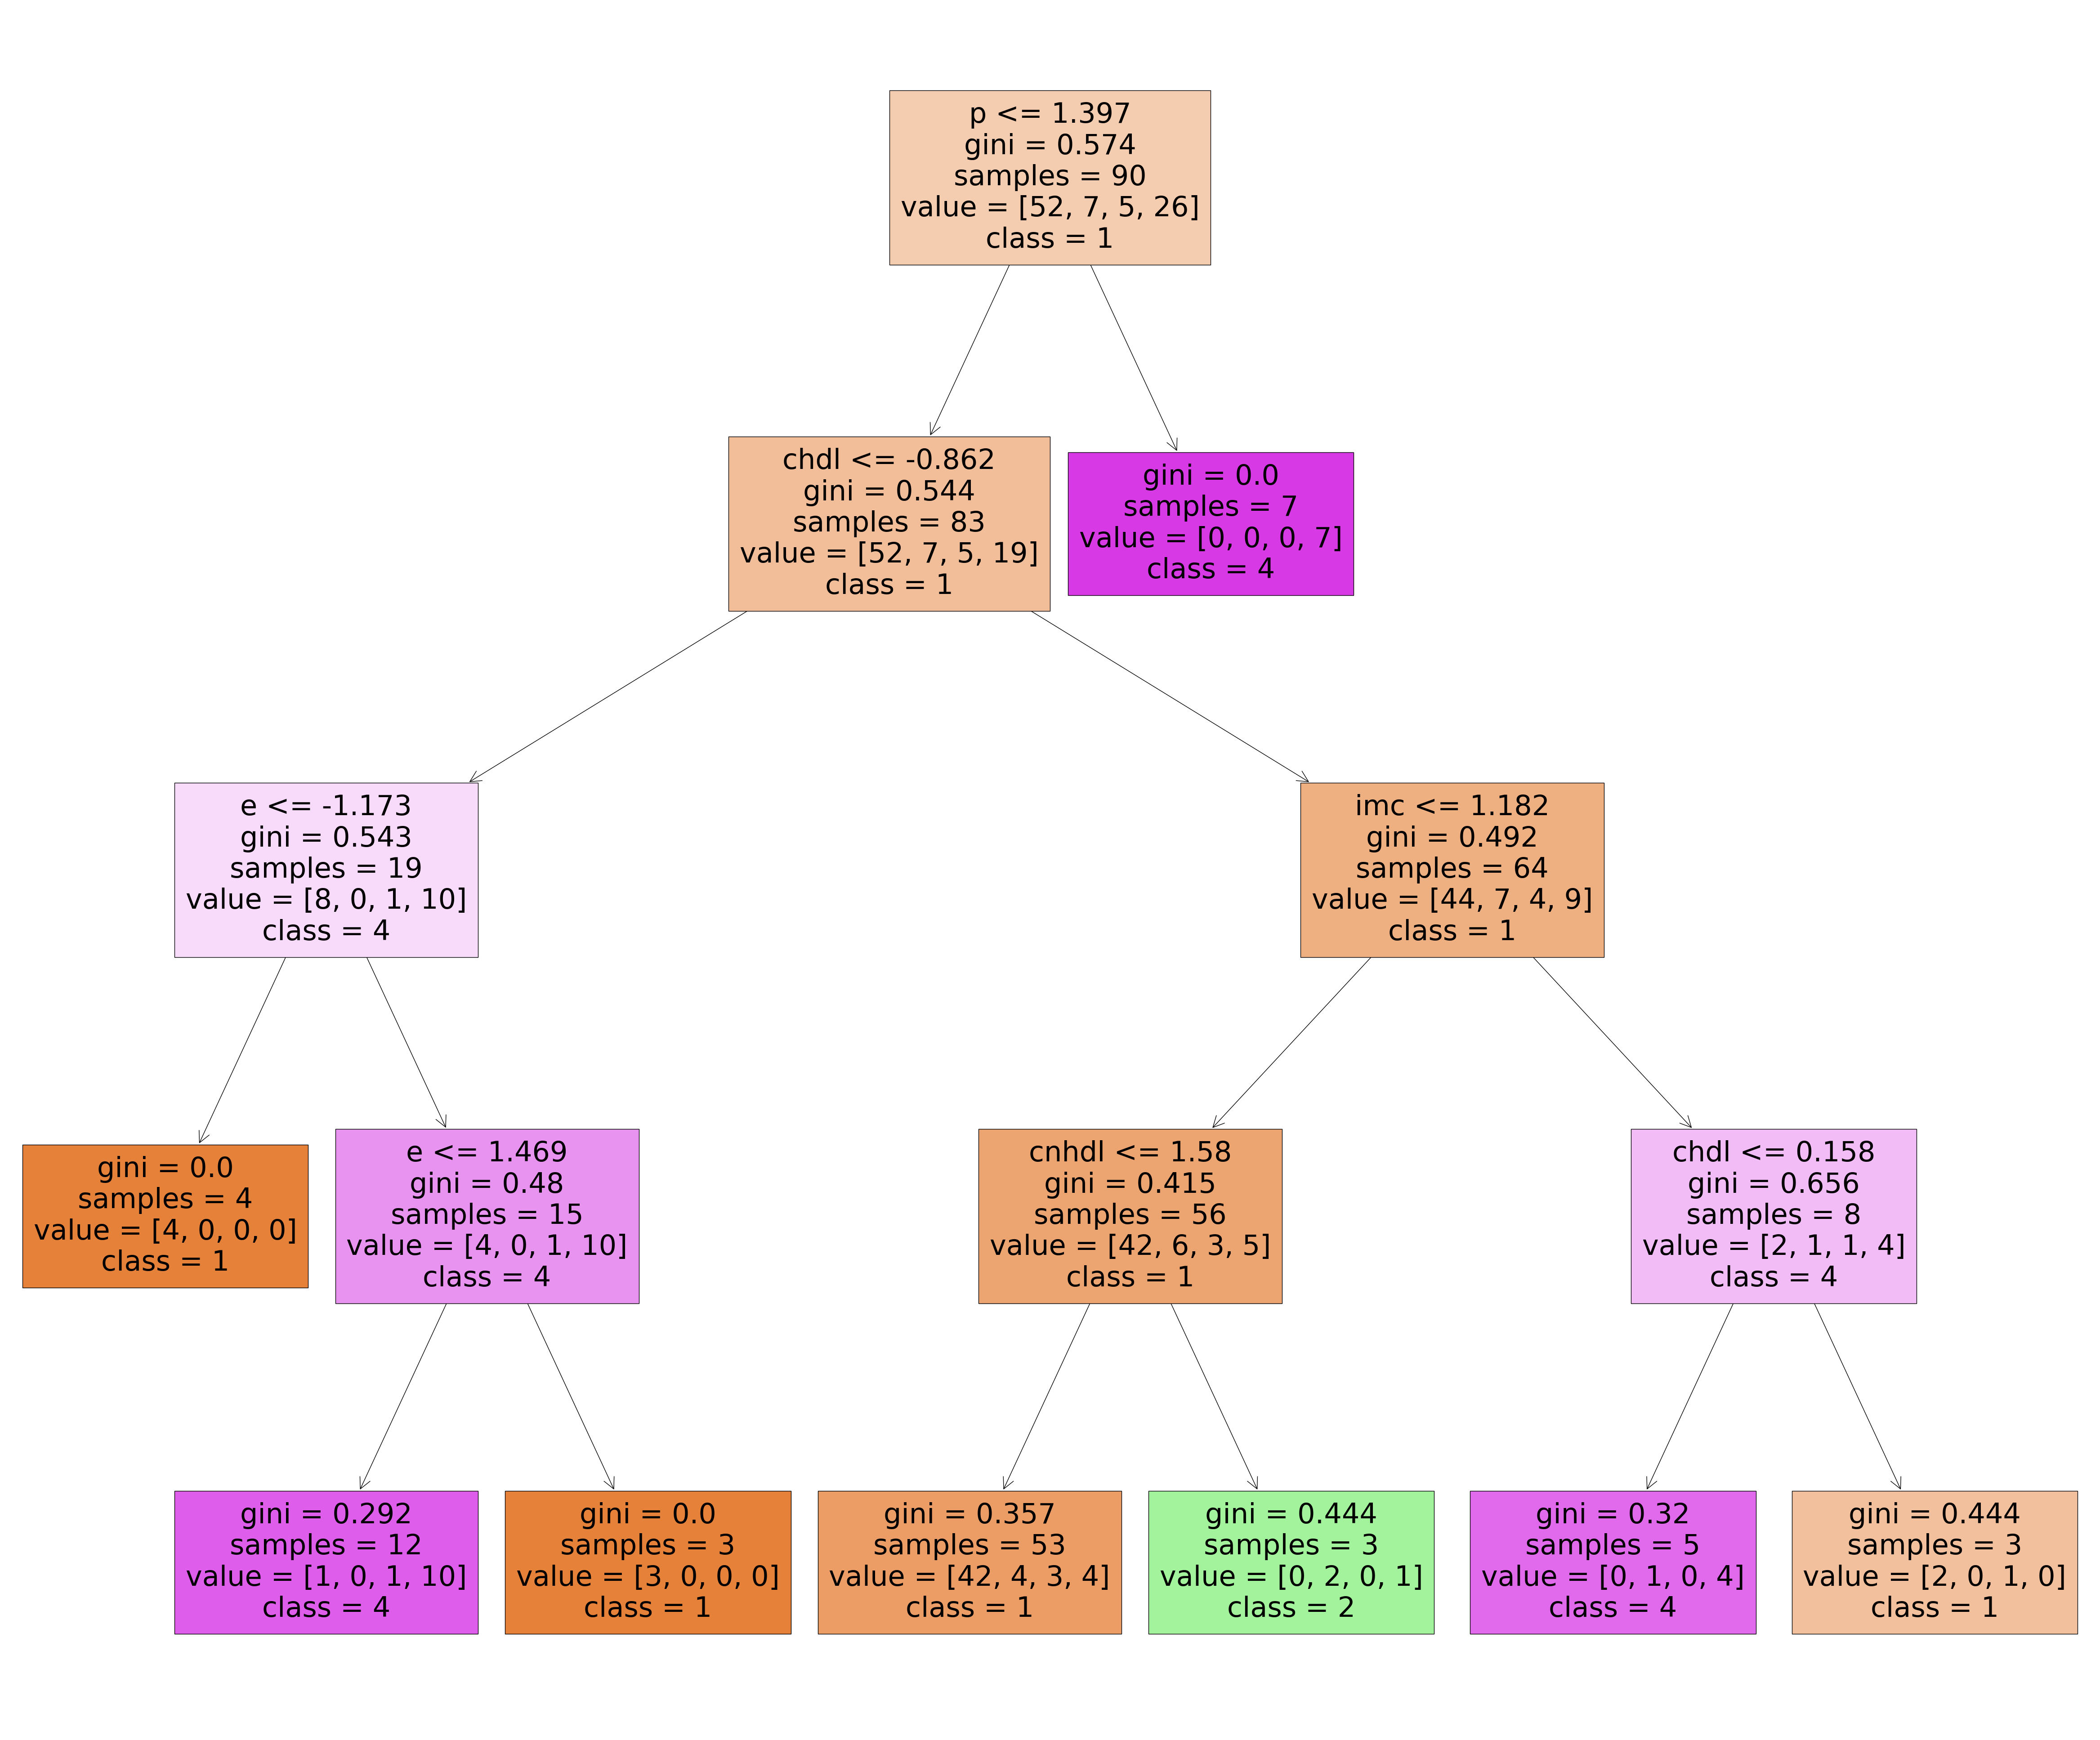

ROC/AUC del Modelo:
0.71


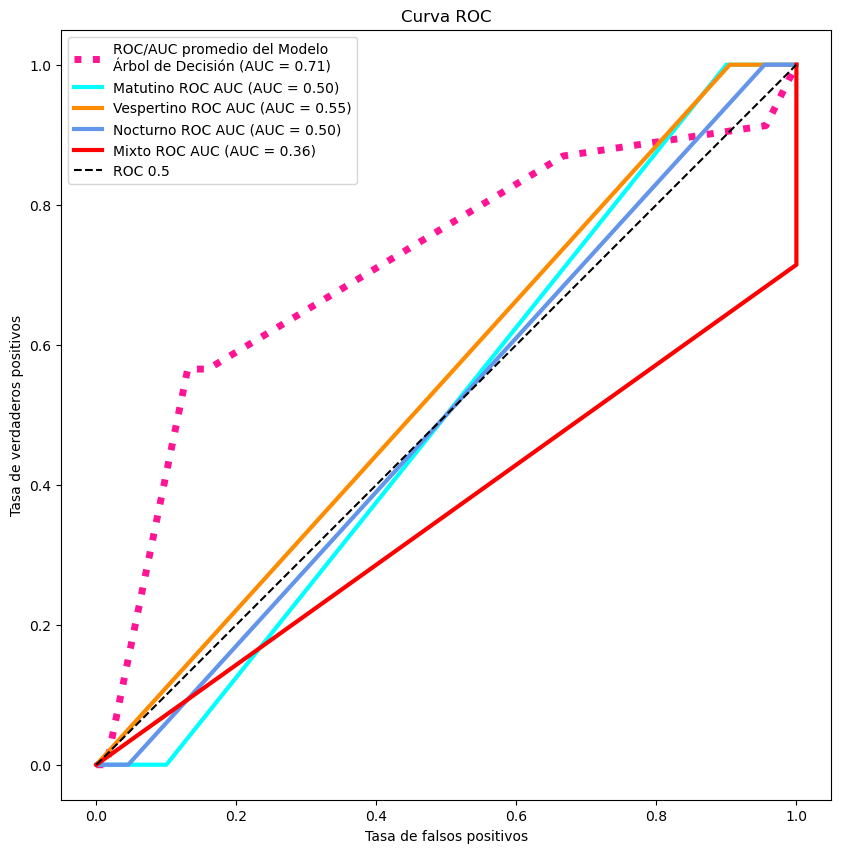

In [149]:
# Evaluamos diferentes profundidades del árbol de decisión
depths = list(range(3, 25))
media_exactitud_profundidad = []
desviacion_estandar_exactitud_arbol = []

for depth in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    arbolu = DecisionTreeClassifier(max_depth = depth)
    arbolu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolu.predict(X_prueba)
    score = cross_val_score(arbolu,X, y, cv = 5, scoring='accuracy')
    media_exactitud_profundidad.append(score.mean())
    desviacion_estandar_exactitud_arbol.append(score.std())

profundidad_optima = depths[np.argmax(media_exactitud_profundidad)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
       X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
              X, y, test_size = 0.2, 
              random_state = arreglo, stratify = y)
       arbolu = DecisionTreeClassifier(max_depth = profundidad_optima)
       arbolu.fit(X_entrenamiento, y_entrenamiento)
       score = cross_val_score(arbolu, X, y, cv = 5, scoring = 'accuracy')
       y_prediccion = arbolu.predict(X_prueba)
       exactitud = accuracy_score(y_prueba, y_prediccion)
       exactitud_arreglo.append(exactitud)

media_exactitud_arbolu = np.mean(exactitud_arreglo)
desviacion_estandar_arbolu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_arbolu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo
# para entrenar el modelo 'arbolu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, 
       random_state =  arreglo_aleatorio_optimo_arbolu, stratify = y)
arbolu = DecisionTreeClassifier(max_depth = profundidad_optima)
arbolu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arbolu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arbolu'
# --------------------

y_puntaje_arbolu = arbolu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_arbolu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_arbolu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))


# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

print(f'\ny_puntaje:\n{y_puntaje_arbolu[0:2,:]}')
print()
print(f'y_puntaje.ravel():\n{y_puntaje_arbolu[0:2,:].ravel()}')

# Métricas de evaluación
exactitud_arbolu = accuracy_score(y_prueba, y_prediccion)
precision_arbolu = precision_score(y_prueba, y_prediccion, average="weighted")
sensibilidad_arbolu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_arbolu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_arbolu = roc_auc_score(y_prueba, y_puntaje_arbolu,
                                        multi_class='ovr', average='micro')

print("\nProfundidad óptima del árbol de decisión:", profundidad_optima)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_arbolu)
print("Exactitud media del modelo de árbol de decisión:", 
      round(media_exactitud_arbolu, 2))
print("Desviación estándar de la exactitud del modelo de árbol de decisión:", 
      round(desviacion_estandar_arbolu, 2))
matriz_confusion_arbolu = confusion_matrix(y_prueba, y_prediccion)



print("Exactitud de arbolu:", round(exactitud_arbolu, 2))
print("Precisión de arbolu:", round(precision_arbolu, 2))
print("Sensibilidad de arbolu:", round(sensibilidad_arbolu, 2))
print("F1-score de arbolu:", round(f1_arbolu, 2))
print("ROC/AUC de arbolu:", round(micro_roc_auc_ovr_arbolu, 2))

print("\nMatriz de confusión:\n", matriz_confusion_arbolu)



# --------------------
# Graficamos las métricas del modelo 'arbolu'
# --------------------

# Exactitud media vs Profundidad del árbol
plt.figure()
plt.plot(depths, media_exactitud_profundidad, 'o--')
plt.xlabel('Profundidad del árbol') 
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Profundidad del árbol')
plt.axvline(profundidad_optima, color='r', linestyle='--', 
            label=f'Profundidad del árbol: {profundidad_optima}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_arbolu, color='r', linestyle='--', 
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs Profundidad del árbol
plt.plot(depths, media_exactitud_profundidad, "g")
plt.fill_between(
    depths, np.array(media_exactitud_profundidad) - 1 * np.array(desviacion_estandar_exactitud_arbol),
    np.array(media_exactitud_profundidad) + 1 * np.array(desviacion_estandar_exactitud_arbol), alpha = 0.05)
plt.fill_between(
    depths, np.array(media_exactitud_profundidad) - 3 * np.array(desviacion_estandar_exactitud_arbol),
    np.array(media_exactitud_profundidad) + 3 * np.array(desviacion_estandar_exactitud_arbol), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("Profundidad del árbol")
plt.title("Exactitud media vs Profundidad del modelo de árbol de decisión")
plt.tight_layout()
plt.show()

# Gráfica del modelo de árbol de decisión
plt.figure(figsize=(60,50))
class_names = [str(cls) for cls in arbolu.classes_]
plot_tree(arbolu, feature_names = variables_predictoras, class_names = class_names,
          filled = True)
plt.show()




#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_arbolu, tpr_arbolu, roc_auc_arbolu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_arbolu['micro'], tpr_arbolu['micro'], _ = roc_curve(
    y_onehot_prueba_arbolu.ravel(), y_puntaje_arbolu.ravel())
roc_auc_arbolu['micro'] = auc(fpr_arbolu['micro'], tpr_arbolu['micro'])
print(f"ROC/AUC del Modelo:\n{roc_auc_arbolu['micro']:.2f}")

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_arbolu['micro'],
    tpr_arbolu['micro'],
    label=f"ROC/AUC promedio del Modelo \nÁrbol de Decisión (AUC = {roc_auc_arbolu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                          ['aqua', 'darkorange', 'cornflowerblue', 'red']):
    RocCurveDisplay.from_predictions(
        y_onehot_prueba_arbolu[:, id_clase],
        y_puntaje_arbolu[:, id_clase],
        name=f"{clase_nombres[id_clase]} ROC AUC", 
        color=color,
        linewidth=3,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


##### Bosque aleatorio

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

Estimador óptimo del bosque aleatorio: 110
Arreglo aleatorio óptimo: 73
Exactitud media del modelo de bosque aleatorio: 0.64
Desviación estándar de la exactitud del modelo de bosque aleatorio: 0.04
Exactitud de bosque: 0.7
Precisión de bosqueu: 0.64
Sensibilidad de bosqueu: 0.7
F1-score de bosqueu: 0.66
ROC/AUC de bosqueu: 0.88

Matriz de confusión
: [[12  0  1  0]
 [ 1  0  0  1]
 [ 1  0  0  0]
 [ 3  0  0  4]]


/workspaces/crispy-invention_metodos/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


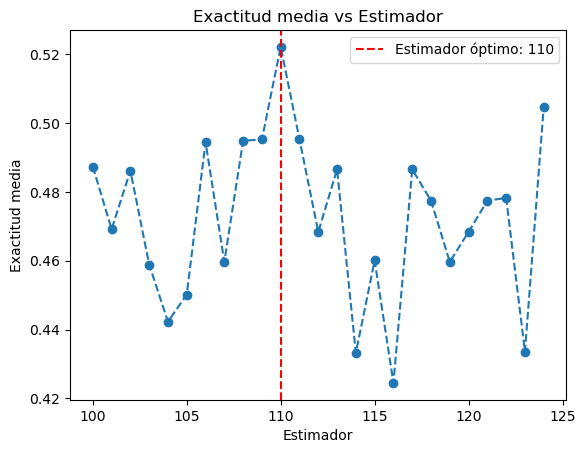

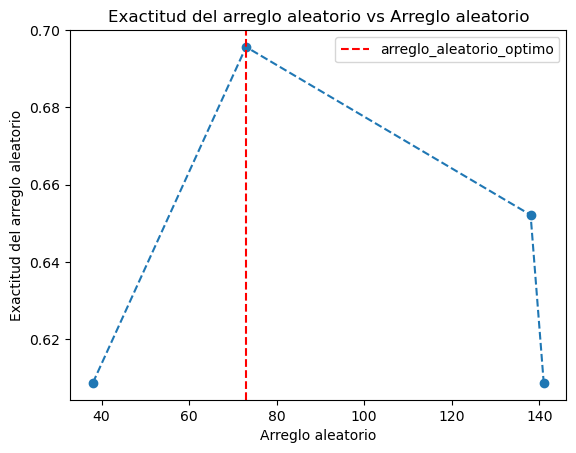

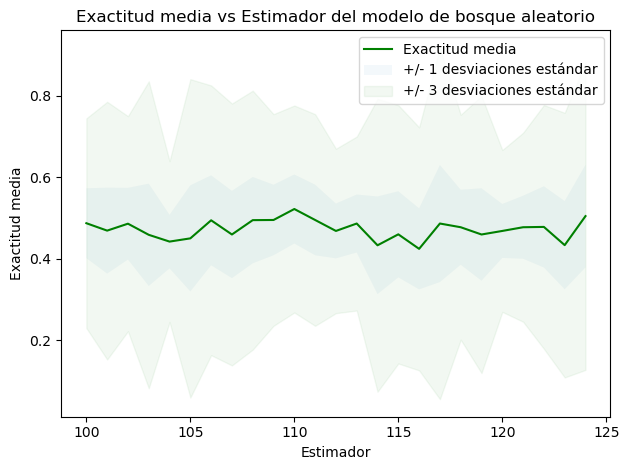

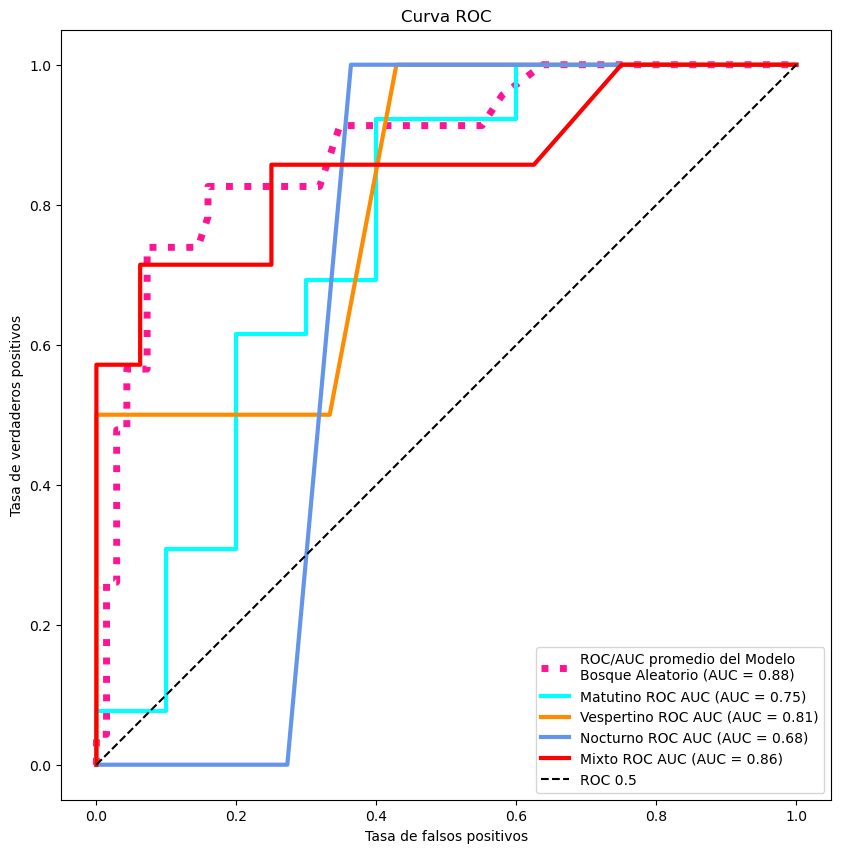

In [150]:
# Evaluamos diferentes valores de estimadores
estimadores = list(range(100, 125))
media_exactitud_estimadores = []
desviacion_estandar_exactitud_estimadores = []

for estimator in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    bosqueu = RandomForestClassifier(n_estimators = estimator)
    bosqueu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosqueu.predict(X_prueba)
    score = cross_val_score(bosqueu,X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_estimadores.append(score.mean())
    desviacion_estandar_exactitud_estimadores.append(score.std())

estimador_optimo_u = estimadores[np.argmax(media_exactitud_estimadores)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo, stratify = y)
    bosqueu = RandomForestClassifier(n_estimators = estimador_optimo_u)
    bosqueu.fit(X_entrenamiento, y_entrenamiento)
    score = cross_val_score(bosqueu, X, y, cv = 5, scoring = 'accuracy')
    y_prediccion = bosqueu.predict(X_prueba)
    exactitud = accuracy_score(y_prueba, y_prediccion)
    exactitud_arreglo.append(exactitud)

media_exactitud_bosqueu = np.mean(exactitud_arreglo)
desviacion_estandar_bosqueu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_bosqueu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosqueu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, random_state = arreglo_aleatorio_optimo_bosqueu, stratify = y)
bosqueu = RandomForestClassifier(n_estimators = estimador_optimo_u)
bosqueu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosqueu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosqueu'
# --------------------

y_puntaje_bosqueu = bosqueu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_bosqueu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_bosqueu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

# Métricas de evaluación
exactitud_bosqueu = accuracy_score(y_prueba, y_prediccion)
precision_bosqueu = precision_score(y_prueba, y_prediccion, average="weighted")
sensiblidad_bosqueu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_bosqueu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_bosqueu = roc_auc_score(y_prueba, y_puntaje_bosqueu,
                                        multi_class='ovr', average='micro')

print("\nEstimador óptimo del bosque aleatorio:", estimador_optimo_u)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_bosqueu)
print("Exactitud media del modelo de bosque aleatorio:",
        round(media_exactitud_bosqueu, 2))
print("Desviación estándar de la exactitud del modelo de bosque aleatorio:",
        round(desviacion_estandar_bosqueu, 2))
matriz_confusion_bosqueu = confusion_matrix(y_prueba, y_prediccion)

print("Exactitud de bosque:", round(exactitud_bosqueu, 2))
print("Precisión de bosqueu:", round(precision_bosqueu, 2))
print("Sensibilidad de bosqueu:", round(sensiblidad_bosqueu, 2))
print("F1-score de bosqueu:", round(f1_bosqueu, 2))
print("ROC/AUC de bosqueu:", round(micro_roc_auc_ovr_bosqueu, 2))

print("\nMatriz de confusión\n:", matriz_confusion_bosqueu)



# --------------------
# Graficamos las métricas del modelo 'knnu'
# --------------------

# Exactitud media vs Estimador
plt.figure()
plt.plot(estimadores, media_exactitud_estimadores, 'o--')
plt.xlabel('Estimador')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Estimador')
plt.axvline(estimador_optimo_u, color='r', linestyle='--',
            label=f'Estimador óptimo: {estimador_optimo_u}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_bosqueu, color='r', linestyle='--',
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs Estimador
plt.plot(estimadores, media_exactitud_estimadores, "g")
plt.fill_between(
    estimadores, np.array(media_exactitud_estimadores) - 1 * np.array(desviacion_estandar_exactitud_estimadores),
    np.array(media_exactitud_estimadores) + 1 * np.array(desviacion_estandar_exactitud_estimadores), alpha = 0.05)
plt.fill_between(
    estimadores, np.array(media_exactitud_estimadores) - 3 * np.array(desviacion_estandar_exactitud_estimadores),
    np.array(media_exactitud_estimadores) + 3 * np.array(desviacion_estandar_exactitud_estimadores), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("Estimador")
plt.title("Exactitud media vs Estimador del modelo de bosque aleatorio")
plt.tight_layout()
plt.show()



#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_bosqueu, tpr_bosqueu, roc_auc_bosqueu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_bosqueu['micro'], tpr_bosqueu['micro'], _ = roc_curve(
    y_onehot_prueba_bosqueu.ravel(), y_puntaje_bosqueu.ravel())
roc_auc_bosqueu['micro'] = auc(fpr_bosqueu['micro'], tpr_bosqueu['micro'])

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_bosqueu['micro'],
    tpr_bosqueu['micro'],
    label=f"ROC/AUC promedio del Modelo \nBosque Aleatorio (AUC = {roc_auc_bosqueu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                            ['aqua', 'darkorange', 'cornflowerblue', 'red']):
        RocCurveDisplay.from_predictions(
            y_onehot_prueba_bosqueu[:, id_clase],
            y_puntaje_bosqueu[:, id_clase],
            name=f"{clase_nombres[id_clase]} ROC AUC", 
            color=color,
            linewidth=3,
            ax=ax,
        )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

##### KNN

Existen recomendaciones generales para realizar predicciones con el modelo KNN.
1.-La K siempre debe ser impar
2.-El número de vecinos cercanos desde el cúal podemos iniciar nuestro análisis debe ser mayor a 1 y menor que la raíz cuadrada del número de datos
3.-Debemos evaluar diferentes K para encontrar el de mejor rendimiento sin llegar al sobreajuste del modelo predictivo
4.-KNN no se comporta de manera adecuada cuando los datos son imbalanceados y cuando la elección de K es complicada, en estos casos se sugiere elegir otro modelo KNN
5.-Tener en cuenta Los siguientes puntos:
    5.1.-Normalización: como es una técnica basada en cálculos de distancias. Los datos siempre deben estar normalizados.
    5.2.-Numerizar: Los atributos categóricos deben ser convertidos a números.
    5.3.-Eliminar outliers: la técnica de KNN es sensible a valores extremos.
    5.4.-Selección de características: seleccionar aquellas que sean más relevantes para la variable objetivo. Regla 5.-No se comporta bien con datos imbalanceados y es dificil elegir la K

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

K óptimo del modelo de vecinos cercanos: 23
Arreglo aleatorio óptimo: 38
Exactitud media del modelo de vecinos cercanos: 0.57
Desviación estándar de la exactitud del modelo de vecinos cercanos: 0.0
Exactitud de knnu: 0.57
Precisión de knnu: 0.32
Sensibilidad de knnu: 0.57
F1-score de knnu: 0.41
ROC/AUC de knnu: 0.81

Matriz de confusión
: [[13  0  0  0]
 [ 2  0  0  0]
 [ 1  0  0  0]
 [ 7  0  0  0]]


/workspaces/crispy-invention_metodos/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


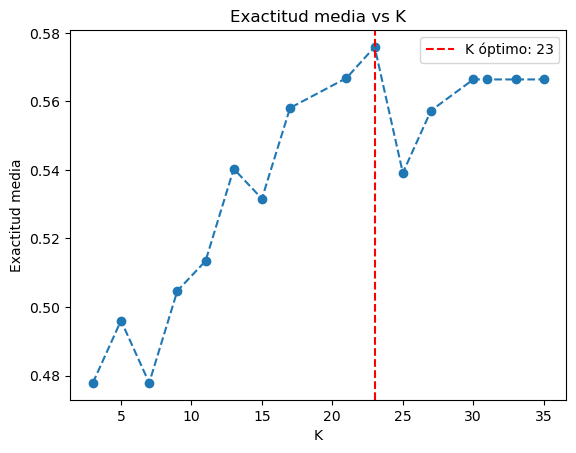

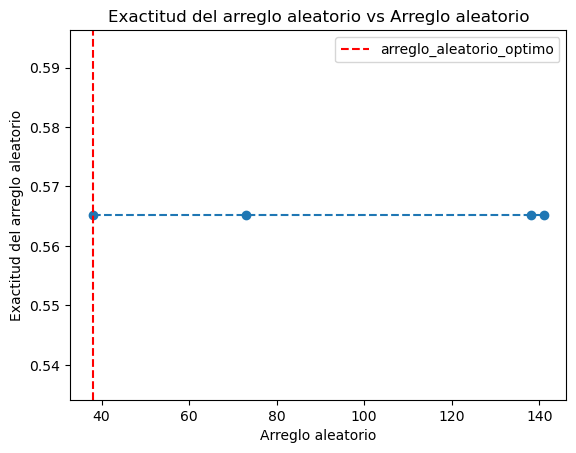

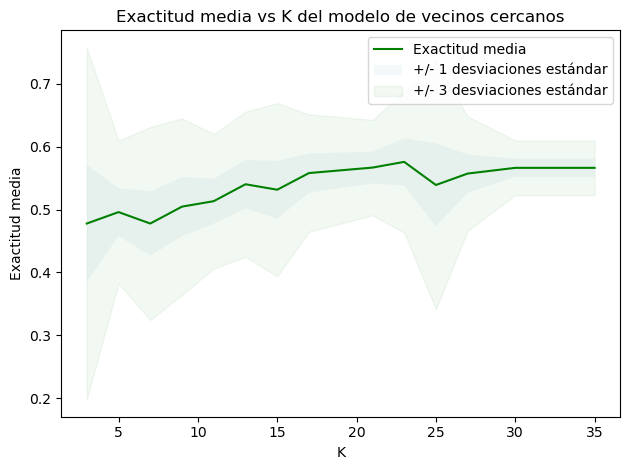

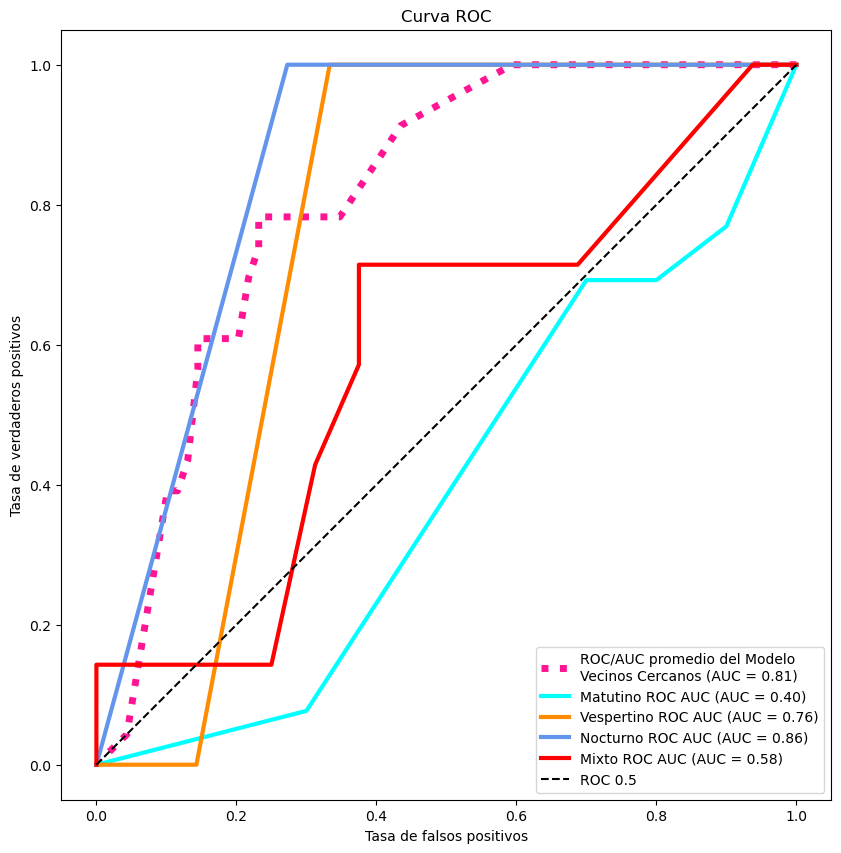

In [151]:
# Evaluamos diferentes valores de vecinos cercanos
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
media_exactitud_k = []
desviacion_estandar_exactitud_k = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    knnu = KNeighborsClassifier(n_neighbors = k)
    knnu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnu.predict(X_prueba)
    score = cross_val_score(knnu,X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_k.append(score.mean())
    desviacion_estandar_exactitud_k.append(score.std())

k_optimo = valores_k[np.argmax(media_exactitud_k)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo, stratify = y)
    knnu = KNeighborsClassifier(n_neighbors = k_optimo)
    knnu.fit(X_entrenamiento, y_entrenamiento)
    score = cross_val_score(knnu, X, y, cv = 5, scoring = 'accuracy')
    y_prediccion = knnu.predict(X_prueba)
    exactitud = accuracy_score(y_prueba, y_prediccion)
    exactitud_arreglo.append(exactitud)
    
media_exactitud_knnu = np.mean(exactitud_arreglo)
desviacion_estandar_knnu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_knnu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knnu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, random_state = arreglo_aleatorio_optimo_knnu, stratify = y)
knnu = KNeighborsClassifier(n_neighbors = k_optimo)
knnu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knnu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'knnu'
# --------------------

y_puntaje_knnu = knnu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_knnu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_knnu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

# Métricas de evaluación
exactitud_knnu = accuracy_score(y_prueba, y_prediccion)
precision_knnu = precision_score(y_prueba, y_prediccion, average="weighted")
sensiblidad_knnu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_knnu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_knnu = roc_auc_score(y_prueba, y_puntaje_knnu,
                                        multi_class='ovr', average='micro')

print("\nK óptimo del modelo de vecinos cercanos:", k_optimo)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_knnu)
print("Exactitud media del modelo de vecinos cercanos:",
        round(media_exactitud_knnu, 2))
print("Desviación estándar de la exactitud del modelo de vecinos cercanos:",
        round(desviacion_estandar_knnu, 2))
matriz_confusion_knnu = confusion_matrix(y_prueba, y_prediccion)

print("Exactitud de knnu:", round(exactitud_knnu, 2))
print("Precisión de knnu:", round(precision_knnu, 2))
print("Sensibilidad de knnu:", round(sensiblidad_knnu, 2))
print("F1-score de knnu:", round(f1_knnu, 2))
print("ROC/AUC de knnu:", round(micro_roc_auc_ovr_knnu, 2))

print("\nMatriz de confusión\n:", matriz_confusion_knnu)



# --------------------
# Graficamos las métricas del modelo 'knnu'
# --------------------

# Exactitud media vs K
plt.figure()
plt.plot(valores_k, media_exactitud_k, 'o--')
plt.xlabel('K')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs K')
plt.axvline(k_optimo, color='r', linestyle='--',
            label=f'K óptimo: {k_optimo}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_knnu, color='r', linestyle='--',
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs K
plt.plot(valores_k, media_exactitud_k, "g")
plt.fill_between(
    valores_k, np.array(media_exactitud_k) - 1 * np.array(desviacion_estandar_exactitud_k),
    np.array(media_exactitud_k) + 1 * np.array(desviacion_estandar_exactitud_k), alpha = 0.05)
plt.fill_between(
    valores_k, np.array(media_exactitud_k) - 3 * np.array(desviacion_estandar_exactitud_k),
    np.array(media_exactitud_k) + 3 * np.array(desviacion_estandar_exactitud_k), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("K")
plt.title("Exactitud media vs K del modelo de vecinos cercanos")
plt.tight_layout()
plt.show()



#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_knnu, tpr_knnu, roc_auc_knnu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_knnu['micro'], tpr_knnu['micro'], _ = roc_curve(
    y_onehot_prueba_knnu.ravel(), y_puntaje_knnu.ravel())
roc_auc_knnu['micro'] = auc(fpr_knnu['micro'], tpr_knnu['micro'])

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_knnu['micro'],
    tpr_knnu['micro'],
    label=f"ROC/AUC promedio del Modelo \nVecinos Cercanos (AUC = {roc_auc_knnu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                            ['aqua', 'darkorange', 'cornflowerblue', 'red']):
        RocCurveDisplay.from_predictions(
            y_onehot_prueba_knnu[:, id_clase],
            y_puntaje_knnu[:, id_clase],
            name=f"{clase_nombres[id_clase]} ROC AUC", 
            color=color,
            linewidth=3,
            ax=ax,
        )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

##### Elección del mejor modelo

In [152]:
# Creamos diccionarios para elegir el mejor modelo
modelosu = {
    'modelo_arbolu_diccionario': {
        'modelo': arbolu,
        'exactitud': exactitud_arbolu,
        'precision': precision_arbolu,
        'sensibilidad': sensibilidad_arbolu,
        'f1': f1_arbolu,
        'micro_roc_auc': micro_roc_auc_ovr_arbolu,
        'matriz_confusion': matriz_confusion_arbolu,
        'fpr': fpr_arbolu,
        'tpr': tpr_arbolu,
        'roc_auc': roc_auc_arbolu
    },
    'modelo_bosqueu_diccionario': {
        'modelo': bosqueu,
        'exactitud': exactitud_bosqueu,
        'precision': precision_bosqueu,
        'sensibilidad': sensiblidad_bosqueu,
        'f1': f1_bosqueu,
        'micro_roc_auc': micro_roc_auc_ovr_bosqueu,
        'matriz_confusion': matriz_confusion_bosqueu,
        'fpr': fpr_bosqueu,
        'tpr': tpr_bosqueu,
        'roc_auc': roc_auc_bosqueu
    },
    'modelo_knnu_diccionario': {
        'modelo': knnu,
        'exactitud': exactitud_knnu,
        'precision': precision_knnu,
        'sensibilidad': sensiblidad_knnu,
        'f1': f1_knnu,
        'micro_roc_auc': micro_roc_auc_ovr_knnu,
        'matriz_confusion': matriz_confusion_knnu,
        'fpr': fpr_knnu,
        'tpr': tpr_knnu,
        'roc_auc': roc_auc_knnu
    }
}

# Accesamos a los diccionarios
arbolu_dict = modelosu['modelo_arbolu_diccionario']
bosqueu_dict = modelosu['modelo_bosqueu_diccionario']
knnu_dict = modelosu['modelo_knnu_diccionario']

# Comparamos la exactitud, precision, sensibilidad, f1, micro_roc_aic de los modelos

# -------------------- #
# Exactitud
# -------------------- #
if arbolu_dict['exactitud'] > bosqueu_dict['exactitud'] and arbolu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \n     arbolu ({arbolu_dict['exactitud']:.2f})")
elif bosqueu_dict['exactitud'] > arbolu_dict['exactitud'] and bosqueu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \n     bosqueu ({bosqueu_dict['exactitud']:.2f})")
else:
    print(f"Mejor exactitud: \n     knnu ({knnu_dict['exactitud']:.2f})")

# -------------------- #
# Precisión
# -------------------- #

if arbolu_dict['precision'] > bosqueu_dict['precision'] and arbolu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precision: \n     arbolu ({arbolu_dict['precision']:.2f})")
elif bosqueu_dict['precision'] > arbolu_dict['precision'] and bosqueu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precision: \n     bosqueu ({bosqueu_dict['precision']:.2f})")
else:
    print(f"Mejor precision: \n     knnu ({knnu_dict['precision']:.2f})")

# -------------------- #
# Sensibilidad
# -------------------- #

if arbolu_dict['sensibilidad'] > bosqueu_dict['sensibilidad'] and arbolu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \n     arbolu ({arbolu_dict['sensibilidad']:.2f})")
elif bosqueu_dict['sensibilidad'] > arbolu_dict['sensibilidad'] and bosqueu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \n     bosqueu ({bosqueu_dict['sensibilidad']:.2f})")
else:
    print(f"Mejor sensibilidad: \n     knnu ({knnu_dict['sensibilidad']:.2f})")

# -------------------- #
# F1
# -------------------- #

if arbolu_dict['f1'] > bosqueu_dict['f1'] and arbolu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \n     arbolu ({arbolu_dict['f1']:.2f})")
elif bosqueu_dict['f1'] > arbolu_dict['f1'] and bosqueu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \n     bosqueu ({bosqueu_dict['f1']:.2f})")
else:
    print(f"Mejor f1: \n     knnu ({knnu_dict['f1']:.2f})")

# -------------------- #
# ROC/AUC
# -------------------- #

if arbolu_dict['micro_roc_auc'] > bosqueu_dict['micro_roc_auc'] and arbolu_dict['micro_roc_auc'] > knnu_dict['micro_roc_auc']:
    print(f"Mejor micro_roc_auc: \n     arbolu ({arbolu_dict['micro_roc_auc']:.2f})")
elif bosqueu_dict['micro_roc_auc'] > arbolu_dict['micro_roc_auc'] and bosqueu_dict['micro_roc_auc'] > knnu_dict['micro_roc_auc']:
    print(f"Mejor micro_roc_auc: \n     bosqueu ({bosqueu_dict['micro_roc_auc']:.2f})")
else:
    print(f"Mejor micro_roc_auc: \n     knnu ({knnu_dict['micro_roc_auc']:.2f})")


# Creamos una lista de tuplas con el nombre de los modelos y los valores de las métricas principales
eleccion_modelou = [('arbolu', arbolu_dict['exactitud'], arbolu_dict['precision'], 
                     arbolu_dict['sensibilidad'], arbolu_dict['f1'], arbolu_dict['micro_roc_auc']),
                    ('bosqueu', bosqueu_dict['exactitud'], bosqueu_dict['precision'], 
                     bosqueu_dict['sensibilidad'], bosqueu_dict['f1'], bosqueu_dict['micro_roc_auc']),
                    ('knnu', knnu_dict['exactitud'], knnu_dict['precision'], 
                     knnu_dict['sensibilidad'], knnu_dict['f1'], knnu_dict['micro_roc_auc'])]

# Ordenamos la lista en orden descendente por el valor de exactitud, precision, sensibilidad, f1 y micro_roc_auc
eleccion_modelou.sort(key=lambda x: (x[1], x[2], x[3], x[4], x[5]), reverse=True)

# Seleccionamos el primer elemento de la lista como el mejor modelo
mejor_modelou = eleccion_modelou[0][0]

print(f"\nEl mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: {mejor_modelou}")

Mejor exactitud: 
     bosqueu (0.70)
Mejor precision: 
     bosqueu (0.64)
Mejor sensibilidad: 
     bosqueu (0.70)
Mejor f1: 
     bosqueu (0.66)
Mejor micro_roc_auc: 
     bosqueu (0.88)

El mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: bosqueu


In [153]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelou_obj = modelosu[f"modelo_{mejor_modelou}_diccionario"]['modelo']

prediccion_perdidosu = mejor_modelou_obj.predict(X_perdidos)

# Se agrega la variale objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosu
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

imputados_modelou = desestandarizar_columnas(
    datos_completos,
    columnas_estandarizar,
    medias_columnas,
    desviaciones_columnas
)

exportar_imputados_a_excel(imputados_modelou, 'turno')

### Métodos de Regresión

In [154]:
df_imu = imputados_modelou.copy()

# convertimos las variables categóricas a numéricas
df_imu['s'] = df_imu['s'].astype(float)
df_imu['u'] = df_imu['u'].astype(float)

medias_todas_columnas = df_imu[todas_columnas_estandarizar].mean()
desviaciones_todas_columnas = df_imu[todas_columnas_estandarizar].std()

# Estandarizamos todas las columnas
df_imue = estandarizar_todas_columnas(
    df_imu,
    todas_columnas_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

df_imue.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,-0.670465,-0.69206,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,1.489174,-0.69206,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,-0.670465,-0.69206,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,-0.670465,-0.69206,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,-0.670465,-0.69206,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


#### Variable "ts" (tensión sistólica)

In [155]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas 
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 'pp', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imue.copy() # dfimue = dataframe imputados modelo u estandarizado
datos = df_imue[columnas_seleccionadas]
datos.sort_index(inplace=True)
variable_objetivo = 'ts'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['td', 'cc', 'cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [156]:
depths = list(range(3, 25))
r2_profundidad_ts = []

for depth in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    arbolts = DecisionTreeRegressor(max_depth = depth)
    arbolts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_ts.append(r2)

profundidad_optima_ts = depths[np.argmax(r2_profundidad_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
r2_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    arbolts = DecisionTreeRegressor(max_depth = profundidad_optima_ts)
    arbolts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo.append(r2)

arreglo_aleatorio_optimo_arbolts = arreglo_aleatorio[np.argmax(r2_arreglo)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arbolts'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_arbolts)
arbolts = DecisionTreeRegressor(max_depth = profundidad_optima_ts)
arbolts.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arbolts.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arbolts'
# --------------------

mae_arbolts = mean_absolute_error(y_prueba, y_prediccion)
mse_arbolts = mean_squared_error(y_prueba, y_prediccion)
rmse_arbolts = np.sqrt(mse_arbolts)
r2_arbolts = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de arbolts:", round(mae_arbolts, 2))
print("Error cuadrático medio de arbolts:", round(mse_arbolts, 2))
print("Raíz del error cuadrático medio de arbolts:", round(rmse_arbolts, 2))
print("R-cuadrado de arbolts:", round(r2_arbolts, 2))

Error absoluto medio de arbolts: 0.63
Error cuadrático medio de arbolts: 0.71
Raíz del error cuadrático medio de arbolts: 0.84
R-cuadrado de arbolts: -0.05


##### Bosque aleatorio

In [157]:
estimadores = list(range(100, 125))
r2_estimadores_ts = []

for estimador in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    bosquets = RandomForestRegressor(n_estimators = estimador)
    bosquets.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquets.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_estimadores_ts.append(r2)

estimador_optimo_ts = estimadores[np.argmax(r2_estimadores_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
r2_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    bosquets = RandomForestRegressor(n_estimators = estimador_optimo_ts)
    bosquets.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquets.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo.append(r2)

arreglo_aleatorio_optimo_bosquets = arreglo_aleatorio[np.argmax(r2_arreglo)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosquets'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_bosquets)
bosquets = RandomForestRegressor(n_estimators = estimador_optimo_ts)
bosquets.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosquets.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosquets'
# --------------------

mae_bosquets = mean_absolute_error(y_prueba, y_prediccion)
mse_bosquets = mean_squared_error(y_prueba, y_prediccion)
rmse_bosquets = np.sqrt(mse_bosquets)
r2_bosquets = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de bosquets:", round(mae_bosquets, 2))
print("Error cuadrático medio de bosquets:", round(mse_bosquets, 2))
print("Raíz del error cuadrático medio de bosquets:", round(rmse_bosquets, 2))
print("R-cuadrado de bosquets:", round(r2_bosquets, 2))

Error absoluto medio de bosquets: 0.5
Error cuadrático medio de bosquets: 0.4
Raíz del error cuadrático medio de bosquets: 0.63
R-cuadrado de bosquets: 0.41


##### KNN

In [158]:
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_ts = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2)
    knnts = KNeighborsRegressor(n_neighbors = k)
    knnts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_k_ts.append(r2)

k_optimo_ts = valores_k[np.argmax(r2_k_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
r2_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    knnts = KNeighborsRegressor(n_neighbors = k_optimo_ts)
    knnts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo.append(r2)

arreglo_aleatorio_optimo_knnts = arreglo_aleatorio[np.argmax(r2_arreglo)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knnts'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_knnts)
knnts = KNeighborsRegressor(n_neighbors = k_optimo_ts)
knnts.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knnts.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'knnts'
# --------------------

mae_knnts = mean_absolute_error(y_prueba, y_prediccion)
mse_knnts = mean_squared_error(y_prueba, y_prediccion)
rmse_knnts = np.sqrt(mse_knnts)
r2_knnts = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de knnts:", round(mae_knnts, 2))
print("Error cuadrático medio de knnts:", round(mse_knnts, 2))
print("Raíz del error cuadrático medio de knnts:", round(rmse_knnts, 2))
print("R-cuadrado de knnts:", round(r2_knnts, 2))

Error absoluto medio de knnts: 0.45
Error cuadrático medio de knnts: 0.37
Raíz del error cuadrático medio de knnts: 0.61
R-cuadrado de knnts: 0.24


##### Elección del mejor modelo

In [159]:
modelosts = {
    'modelo_arbolts_diccionario': {
        'modelo': arbolts,
        'mae': mae_arbolts,
        'mse': mse_arbolts,
        'rmse': rmse_arbolts,
        'r2': r2_arbolts
    },
    'modelo_bosquets_diccionario': {
        'modelo': bosquets,
        'mae': mae_bosquets,
        'mse': mse_bosquets,
        'rmse': rmse_bosquets,
        'r2': r2_bosquets
    },
    'modelo_knnts_diccionario': {
        'modelo': knnts,
        'mae': mae_knnts,
        'mse': mse_knnts,
        'rmse': rmse_knnts,
        'r2': r2_knnts
    }
}

# Accesamos a los diccionarios
arbolts_dict = modelosts['modelo_arbolts_diccionario']
bosquets_dict = modelosts['modelo_bosquets_diccionario']
knnts_dict = modelosts['modelo_knnts_diccionario']

# Comparamos el error absoluto medio, error cuadrático medio, raíz del error cuadrático medio y r-cuadrado de los modelos

# -------------------- #
# Error absoluto medio
# -------------------- #

if arbolts_dict['mae'] > bosquets_dict['mae'] and arbolts_dict['mae'] > knnts_dict['mae']:
    print(f"Mejor mae (error absoluto medio): \n     arbolts ({arbolts_dict['mae']:.2f})")
elif bosquets_dict['mae'] > arbolts_dict['mae'] and bosquets_dict['mae'] > knnts_dict['mae']:
    print(f"Mejor mae (error absoluto medio): \n     bosquets ({bosquets_dict['mae']:.2f})")
else:
    print(f"Mejor mae (error absoluto medio): \n     knnts ({knnts_dict['mae']:.2f})")

# -------------------- #
# Error cuadrático medio
# -------------------- #

if arbolts_dict['mse'] > bosquets_dict['mse'] and arbolts_dict['mse'] > knnts_dict['mse']:
    print(f"Mejor mse (error cuadrático medio): \n     arbolts ({arbolts_dict['mse']:.2f})")
elif bosquets_dict['mse'] > arbolts_dict['mse'] and bosquets_dict['mse'] > knnts_dict['mse']:
    print(f"Mejor mse (error cuadrático medio): \n     bosquets ({bosquets_dict['mse']:.2f})")
else:
    print(f"Mejor mse (error cuadrático medio): \n     knnts ({knnts_dict['mse']:.2f})")

# -------------------- #
# Raíz del error cuadrático medio
# -------------------- #

if arbolts_dict['rmse'] > bosquets_dict['rmse'] and arbolts_dict['rmse'] > knnts_dict['rmse']:
    print(f"Mejor rmse (raíz del error cuadrático medio): \n     arbolts ({arbolts_dict['rmse']:.2f})")
elif bosquets_dict['rmse'] > arbolts_dict['rmse'] and bosquets_dict['rmse'] > knnts_dict['rmse']:
    print(f"Mejor rmse (raíz del error cuadrático medio): \n     bosquets ({bosquets_dict['rmse']:.2f})")
else:
    print(f"Mejor rmse (raíz del error cuadrático medio): \n     knnts ({knnts_dict['rmse']:.2f})")

# -------------------- #
# R-cuadrado
# -------------------- #

if arbolts_dict['r2'] > bosquets_dict['r2'] and arbolts_dict['r2'] > knnts_dict['r2']:
    print(f"Mejor r2 (r-cuadrado): \n     arbolts ({arbolts_dict['r2']:.2f})")
elif bosquets_dict['r2'] > arbolts_dict['r2'] and bosquets_dict['r2'] > knnts_dict['r2']:
    print(f"Mejor r2 (r-cuadrado): \n     bosquets ({bosquets_dict['r2']:.2f})")
else:
    print(f"Mejor r2 (r-cuadrado): \n     knnts ({knnts_dict['r2']:.2f})")

# Creamos una lista de tuplas con el nombre de los modelos y los valores de las métricas principales
eleccion_modelots = [('arbolts', arbolts_dict['mae'], arbolts_dict['mse'], 
                     arbolts_dict['rmse'], arbolts_dict['r2']),
                    ('bosquets', bosquets_dict['mae'], bosquets_dict['mse'], 
                     bosquets_dict['rmse'], bosquets_dict['r2']),
                    ('knnts', knnts_dict['mae'], knnts_dict['mse'], 
                     knnts_dict['rmse'], knnts_dict['r2'])]

# Ordenamos la lista en orden descendente por el valor de mae, mse, rmse y r2
eleccion_modelots.sort(key=lambda x: (x[1], x[2], x[3], x[4]), reverse=True)

# Seleccionamos el primer elemento de la lista como el mejor modelo
mejor_modelots = eleccion_modelots[0][0]

print(f"\nEl mejor modelo basado en Error Absoluto Medio (mae), Error Cuadrático Medio (mse), Raíz Del Error Cuadrático Medio (rmse) y R2 es: {mejor_modelots}")

Mejor mae (error absoluto medio): 
     arbolts (0.63)
Mejor mse (error cuadrático medio): 
     arbolts (0.71)
Mejor rmse (raíz del error cuadrático medio): 
     arbolts (0.84)
Mejor r2 (r-cuadrado): 
     bosquets (0.41)

El mejor modelo basado en Error Absoluto Medio (mae), Error Cuadrático Medio (mse), Raíz Del Error Cuadrático Medio (rmse) y R2 es: arbolts


In [160]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelots_obj = modelosts[f"modelo_{mejor_modelots}_diccionario"]['modelo']

prediccion_perdidosts = mejor_modelots_obj.predict(X_perdidos)

# Se agrega la variale objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosts
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

imputados_modelots = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(imputados_modelots, 'ts')

#### Variable 'td' (tensión diastólica)

In [161]:
df_imts = imputados_modelots.copy()
medias_todas_columnas = df_imts[todas_columnas_estandarizar].mean()
desviaciones_todas_columnas = df_imts[todas_columnas_estandarizar].std()

# Estandarizamos todas las columnas
df_imtse = estandarizar_todas_columnas(
    df_imts,
    todas_columnas_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

df_imtse.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,-0.670465,-0.69206,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,1.489174,-0.69206,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,-0.670465,-0.69206,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,-0.670465,-0.69206,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,-0.670465,-0.69206,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


In [162]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p',
                        't', 'ts', 'td', 'gs',
                        'c', 'hdl', 'cc', 'pp',
                        'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imtse.copy() # dfimtse = dataframe imputados modelo ts estandarizado
datos = df_imtse[columnas_seleccionadas]
datos.sort_index(inplace=True)
variable_objetivo = 'td'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['cc', 'cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [ ]:
depths = list(range(3, 25))
r2_profundidad_td = []

for depth in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    arboltd = DecisionTreeRegressor(max_depth = depth)
    arboltd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arboltd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_td.append(r2)

profundidad_optima_td = depths[np.argmax(r2_profundidad_td)]

# Evaluamos el mejor arreglo aleatorio de los datos
arreglo_aleatorio = [38, 73, 138, 141]
r2_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    arboltd = DecisionTreeRegressor(max_depth = profundidad_optima_td)
    arboltd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arboltd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo.append(r2)

arreglo_aleatorio_optimo_arboltd = arreglo_aleatorio[np.argmax(r2_arreglo)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arboltd'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_arboltd)
arboltd = DecisionTreeRegressor(max_depth = profundidad_optima_td)
arboltd.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arboltd.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arboltd'
# --------------------

mae_arboltd = mean_absolute_error(y_prueba, y_prediccion)
mse_arboltd = mean_squared_error(y_prueba, y_prediccion)
rmse_arboltd = np.sqrt(mse_arboltd)
r2_arboltd = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de arboltd:", round(mae_arboltd, 2))
print("Error cuadrático medio de arboltd:", round(mse_arboltd, 2))
print("Raíz del error cuadrático medio de arboltd:", round(rmse_arboltd, 2))
print("R-cuadrado de arboltd:", round(r2_arboltd, 2))